# Notes

* 95% of the use cases you will encounter will not require anything other than Keras 
  * and tf.data. But now it’s time to dive deeper into TensorFlow and
  * take a look at its lower-level Python API. This will be useful when you need extra
  * control to write custom loss functions, custom metrics, layers, models, initializers,
  * regularizers, weight constraints, and more.

* Tensorflow used by ,such as Google Cloud Speech, Google Photos, and Google Search.
* At the lowest level, **each TensorFlow operation (op for short)** is implemented using
  * **highly efficient C++ code**. Many operations have multiple implementations called
  * **kernels**: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or
  * even TPUs (tensor processing units). As you may know, GPUs can dramatically speed
  * up computations by splitting them into many smaller chunks and running them in 
  * parallel across many GPU threads. TPUs are even faster: they are custom ASIC chips
  * built specifically for deep learning operations
* Most of the time your code will use the high-level APIs (especially Keras and tf.data),
  *  but when you need more flexi‐ bility you will use the lower-level Python API, handling tensors directly
*  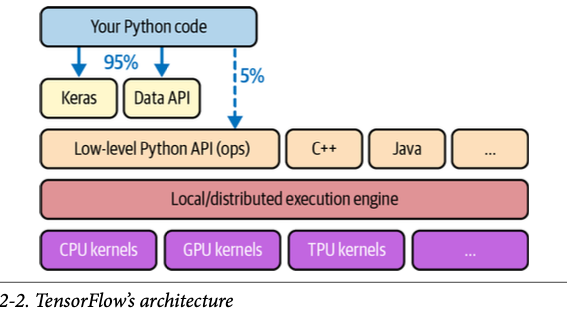

In [139]:
# Add this line to suppress errors in the cell
%config Application.run_line_magic = False


# Libraries

In [140]:
import tensorflow as tf 

import warnings 
warnings.filterwarnings('ignore')


# Tour of TensorFlow

In [141]:
## high level deep learning API
tf.keras

<module 'keras._tf_keras.keras' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/_tf_keras/keras/__init__.py'>

In [142]:
## low level deep learning API
tf.nn

<module 'tensorflow._api.v2.nn' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/nn/__init__.py'>

In [143]:
## Auto differentiation
tf.GradientTape

tensorflow.python.eager.backprop.GradientTape

In [144]:
## mathematics, inlcuding linear algebra, signal processing

tf.math 
tf.linalg
tf.signal
tf.random
tf.bitwise

<module 'tensorflow._api.v2.bitwise' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/bitwise/__init__.py'>

In [145]:
## input output and preprocessing

tf.audio
tf.data
tf.image
tf.io
tf.queue

<module 'tensorflow._api.v2.queue' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/queue/__init__.py'>

In [146]:
## Visualization with Tensor board

tf.summary.__doc__


'Public API for tf._api.v2.summary namespace\n'

In [147]:
## Deployment and optimization

tf.distribute
tf.saved_model 

tf.autograph
tf.graph_util
tf.lite
tf.quantization
tf.tpu
tf.xla 

<module 'tensorflow._api.v2.xla' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/xla/__init__.py'>

In [148]:
## special data structures

tf.lookup 
tf.nest
tf.ragged
tf.sets
tf.sparse
tf.strings

<module 'tensorflow._api.v2.strings' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/strings/__init__.py'>

In [149]:
## miscellanous

tf.experimental
tf.config

<module 'tensorflow._api.v2.config' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/config/__init__.py'>

* here’s TensorFlow Extended (TFX), which is a set of libraries
  * built by Google to productionize TensorFlow projects: it includes tools for data validation,
  *  preprocessing, model analysis, and serving 

# Using TensorFlow like NumPy

* These tensors will be important when we create custom cost functions, custom metrics, custom layers
* The @ operator was added in Python 3.5, for matrix multiplication:
  *  it is equivalent to calling the tf.matmul() function
* tf.add() and tf.math.add() are the same function. This allows TensorFlow
  * to have concise names for the most common operations5 while
  * preserving well-organized packages.
* tf.transpose() function does not do exactly the same thing as NumPy’s T attribute:
  *  in TensorFlow, a new tensor is created
  *  with its own copy of the transposed data, while in NumPy,
*  the tf.reduce_sum() operation is named this way
   *  because its GPU kernel (i.e., GPU implementation) uses a reduce algorithm that does
   *  not guarantee the order in which the elements are added: because 32-bit floats have
   *  limited precision, the result may change ever so slightly every time you call this operation.

In [150]:
t = tf.constant([[1,2,3], [4,5,6]])
t

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [151]:
t.shape

TensorShape([2, 3])

In [152]:
t.dtype

tf.int32

In [153]:
## indexing just like numpy

t[0,2]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [154]:
t[:,1]


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 5], dtype=int32)>

In [155]:
t[..., 1 , tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[2],
       [5]], dtype=int32)>

In [156]:
tf.newaxis

In [157]:
## all sorts of operations in numpy are available in tensorflow
 
t + 10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [158]:
t - 1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]], dtype=int32)>

In [159]:
t * 5

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 5, 10, 15],
       [20, 25, 30]], dtype=int32)>

In [160]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

In [161]:
t

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [162]:
tf.transpose(t)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

In [163]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]], dtype=int32)>

In [164]:
## backend working of add()

tf.add(t,10)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [165]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [166]:
t.__add__(10)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [167]:
## a tensor can also hold a SCALAR value

s = tf.constant(143)
s

<tf.Tensor: shape=(), dtype=int32, numpy=143>

In [168]:
tf.multiply(s, 10)

<tf.Tensor: shape=(), dtype=int32, numpy=1430>

In [169]:
tf.reshape(t, [3,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [170]:
tf.reduce_mean(t)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

# Tensors and NumPy

* Notice that NumPy uses 64-bit precision by default, while TensorFlow
  *  uses 32-bit. This is because 32-bit precision is generally more
  *  than enough for neural networks, plus it runs faster and uses less
  *  RAM. So when you create a tensor from a NumPy array, make sure
  *  **to set dtype=tf.float32.**
*  TensorFlow does n**ot perform any type conversions automatically**
*  use tf.cast() when you really need to convert types

In [171]:
import numpy as np 

a = np.array([1,2,3])
a 

array([1, 2, 3])

In [172]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

In [173]:
d = t.numpy()
d

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [174]:
d.dtype

dtype('int32')

In [175]:
np.square(t)

array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)

In [176]:
## expect an error here due to different data types; continue execution

# tf.constant(2) + tf.constant(40.)

In [177]:
tf.constant(2.) + tf.constant(40.)  

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [178]:
t2 = tf.constant(40., dtype=tf.float64)
t2 

<tf.Tensor: shape=(), dtype=float64, numpy=40.0>

In [179]:
tf.constant(2.) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

# Variables

* tf.Tensor values we’ve seen so far are **immutable**: we cannot modify them
  
* tf.Variable acts much like a tf.Tensor: you can perform the same operations
* it can also be modified in place using the assign() method or assign_add() 

In [180]:
v = tf.Variable([[4.,5.,6.], [8.,7.,6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [8., 7., 6.]], dtype=float32)>

In [181]:
v + 1

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[5., 6., 7.],
       [9., 8., 7.]], dtype=float32)>

In [182]:
v - 2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 3., 4.],
       [6., 5., 4.]], dtype=float32)>

In [183]:
v * 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[40., 50., 60.],
       [80., 70., 60.]], dtype=float32)>

In [184]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 8., 10., 12.],
       [16., 14., 12.]], dtype=float32)>

In [185]:
v[0,2].assign(100)


<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  8.,  10., 100.],
       [ 16.,  14.,  12.]], dtype=float32)>

In [186]:
v[:,2].assign([0.,1.])


<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 8., 10.,  0.],
       [16., 14.,  1.]], dtype=float32)>

In [187]:
v[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([16., 14.,  1.], dtype=float32)>

In [188]:
## direct assignment here will not work; expect a valid error

# v[1]=[1,2,3]

## other data structures

* sparse tensors
* tensor arrays
* ragged tensors
* string tensors
* sets
* Queues
* 

# custom loss functions

In [189]:
def huber_fn(y_true, y_pred):
    
    error = y_true - y_pred
    this_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(this_small_error, squared_loss, linear_loss)

In [190]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [191]:
model.compile(loss=huber_fn)

# saving and loading models that contain custom components

* when you load a model containing custom objects, 
  * you need to map the names to the objects
* If you decorate the huber_fn() function with @keras.utils.
  * register_keras_serializable(), it will automatically be available
  * to the load_model() function: there’s no need to include it in the
  * custom_objects dictionary.
* Unfortunately, when you save the model, the threshold will not be saved